# ☑️ Assistant/Helper for competitions in Kaggle


**Author:** Bogdan Chernykh 

**Track:** Enterprise Agents  

**Course:** 5-Day AI Agents Intensive w Google x Kaggle

**Date:** November 2025

---

## ✔️ Architecture Overview

This notebook demonstrates a production-ready multi-agent system for automating Kaggle competition workflows.

### ✔️ System Components

| Component | Purpose |
|-----------|---------|
| **Coordinator Agent** | Orchestrates tasks and maintains conversation context |
| **Model Improvement Agent** | Suggests ML model enhancements and tuning strategies |
| **Debug Agent** | Analyzes and fixes code/pipeline errors |
| **Feature Engineering Agent** | Recommends advanced feature transformations |
| **Strategy Agent** | Creates day-by-day competition workflow plans |
| **Insights Agent** | Analyzes competition discussions and winning techniques |

### ✔️ Key Concepts Demonstrated
1. ✅ Function Calling & Custom Tools
2. ✅ Multi-Agent Architecture with Coordinator
3. ✅ Memory & Context Management
4. ✅ Agent Orchestration & Dynamic Routing
5. ✅ Observability & Comprehensive Logging
6. ✅ Session Export & Persistence
7. ✅ Agent Reset & State Management
8. ✅ Conversation Search & Retrieval 
9. ✅ Dynamic Agent Configuration 
10. ✅ Batch Query Processing
11. ✅ Memory Summarization & Auto-Management
12. ✅ Feedback Collection & Continuous Improvement
13. ✅ Response Validation & Quality Assurance
14. ✅ Performance Monitoring & Analytics
---

## **Environment Setup**

In [1]:
import sys
import os
import time
import json
from datetime import datetime
from typing import Dict, List, Any, Optional
from dataclasses import dataclass, field
import warnings

warnings.filterwarnings('ignore')

import google.generativeai as genai
from google.generativeai.types import FunctionDeclaration, Tool
from kaggle_secrets import UserSecretsClient
from IPython.display import display, HTML, clear_output

print("✓ Libraries Loaded")


✓ Libraries Loaded


## **API Configuration**

In [2]:
# Load API Key from Kaggle Secrets
try:
    user_secrets = UserSecretsClient()
    GOOGLE_API_KEY = user_secrets.get_secret("GOOGLE_API_KEY")
    genai.configure(api_key=GOOGLE_API_KEY)
    print("✓ API Key Configured")
except Exception as e:
    print(f"⚠ API Key Error: {str(e)}")
    print("📌 To fix: Go to Add-ons → Secrets → Add 'GOOGLE_API_KEY'")
    GOOGLE_API_KEY = None

# Agent Configuration
CONFIG = {
    "team": "svg",
    "model": "models/gemini-2.5-flash",
    "max_tokens": 2000,
    "temperature": 0.3,
    "version": "2.0.0"
}

print(f"\n{'='*60}")
print(f"{'AGENT CONFIGURATION':^60}")
print(f"{'='*60}")
for k, v in CONFIG.items():
    print(f"{k:.<25} {v}")
print(f"{'='*60}")

✓ API Key Configured

                    AGENT CONFIGURATION                     
team..................... svg
model.................... models/gemini-2.5-flash
max_tokens............... 2000
temperature.............. 0.3
version.................. 2.0.0


## **Tool Functions**

In [3]:
def suggest_model_improvements(model_type: str, current_score: float, target_score: float) -> str:
    """Generate ML model improvement suggestions"""
    prompt = (
        f"As a Kaggle Grandmaster, provide 5 specific improvements for:\n\n"
        f"Model: {model_type}\n"
        f"Current Score: {current_score}\n"
        f"Target Score: {target_score}\n\n"
        f"Include: Architecture changes, training techniques, data augmentation, "
        f"ensemble methods, hyperparameter tuning."
    )
    model = genai.GenerativeModel(CONFIG['model'])
    return model.generate_content(prompt).text


def create_competition_strategy(goal: str, timeframe_days: int, current_position: str) -> str:
    """Create detailed competition strategy plan"""
    prompt = (
        f"Create a day-by-day competition strategy:\n\n"
        f"Goal: {goal}\n"
        f"Timeframe: {timeframe_days} days\n"
        f"Current Position: {current_position}\n\n"
        f"Provide: Daily tasks, time estimates, success metrics, risk mitigation, "
        f"resource requirements."
    )
    model = genai.GenerativeModel(CONFIG['model'])
    return model.generate_content(prompt).text


def debug_code_issue(error_message: str, code_context: str, framework: str = "general") -> str:
    """Debug code with detailed solutions"""
    prompt = (
        f"Debug this issue:\n\n"
        f"Framework: {framework}\n"
        f"Error: {error_message}\n\n"
        f"Code:\n``````\n\n"
        f"Provide: Root cause, corrected code, best practices, testing approach."
    )
    model = genai.GenerativeModel(CONFIG['model'])
    return model.generate_content(prompt).text


def suggest_features(dataset_description: str, target_variable: str, current_features: str) -> str:
    """Suggest advanced feature engineering techniques"""
    prompt = (
        f"Suggest feature engineering for:\n\n"
        f"Dataset: {dataset_description}\n"
        f"Target: {target_variable}\n"
        f"Current Features: {current_features}\n\n"
        f"Provide: 10 new features, interactions, domain transformations, "
        f"code snippets, impact ranking."
    )
    model = genai.GenerativeModel(CONFIG['model'])
    return model.generate_content(prompt).text


def analyze_competition_insights(topic: str, num_sources: int = 5) -> str:
    """Analyze competition discussions and techniques"""
    prompt = (
        f"Analyze Kaggle insights for: {topic}\n\n"
        f"Synthesize: Winning techniques, common approaches, novel methods, "
        f"code patterns, recommendations."
    )
    model = genai.GenerativeModel(CONFIG['model'])
    return model.generate_content(prompt).text


print("✓ 5 Tool Functions Defined")
print("  • suggest_model_improvements")
print("  • create_competition_strategy")
print("  • debug_code_issue")
print("  • suggest_features")
print("  • analyze_competition_insights")

✓ 5 Tool Functions Defined
  • suggest_model_improvements
  • create_competition_strategy
  • debug_code_issue
  • suggest_features
  • analyze_competition_insights


## **Function Declarations**

In [4]:
function_declarations = [
    FunctionDeclaration(
        name="suggest_model_improvements",
        description="Suggests ML model improvements to increase competition score",
        parameters={
            "type": "object",
            "properties": {
                "model_type": {"type": "string", "description": "Model architecture (e.g., XGBoost, Neural Network)"},
                "current_score": {"type": "number", "description": "Current competition score"},
                "target_score": {"type": "number", "description": "Target score to achieve"}
            },
            "required": ["model_type", "current_score", "target_score"]
        }
    ),
    FunctionDeclaration(
        name="create_competition_strategy",
        description="Creates day-by-day strategy plan for competitions",
        parameters={
            "type": "object",
            "properties": {
                "goal": {"type": "string", "description": "Competition goal"},
                "timeframe_days": {"type": "integer", "description": "Days available"},
                "current_position": {"type": "string", "description": "Current standing"}
            },
            "required": ["goal", "timeframe_days", "current_position"]
        }
    ),
    FunctionDeclaration(
        name="debug_code_issue",
        description="Debugs code issues with solutions",
        parameters={
            "type": "object",
            "properties": {
                "error_message": {"type": "string", "description": "Error description"},
                "code_context": {"type": "string", "description": "Code snippet"},
                "framework": {"type": "string", "description": "Framework (e.g., pandas, sklearn)"}
            },
            "required": ["error_message", "code_context"]
        }
    ),
    FunctionDeclaration(
        name="suggest_features",
        description="Suggests feature engineering techniques",
        parameters={
            "type": "object",
            "properties": {
                "dataset_description": {"type": "string", "description": "Dataset description"},
                "target_variable": {"type": "string", "description": "Target variable"},
                "current_features": {"type": "string", "description": "Current features"}
            },
            "required": ["dataset_description", "target_variable", "current_features"]
        }
    ),
    FunctionDeclaration(
        name="analyze_competition_insights",
        description="Analyzes competition discussions and techniques",
        parameters={
            "type": "object",
            "properties": {
                "topic": {"type": "string", "description": "Topic to analyze"},
                "num_sources": {"type": "integer", "description": "Number of sources (default: 5)"}
            },
            "required": ["topic"]
        }
    )
]

tools = Tool(function_declarations=function_declarations)
print(f"✓ Function Declarations Created ({len(function_declarations)} tools)")

✓ Function Declarations Created (5 tools)


## **Memory System**

In [5]:
@dataclass
class ConversationMemory:
    """Manages conversation history and context"""
    messages: List[Dict[str, str]] = field(default_factory=list)
    max_history: int = 20
    
    def add_message(self, role: str, content: str):
        self.messages.append({
            "role": role,
            "content": content,
            "timestamp": datetime.now().isoformat()
        })
        if len(self.messages) > self.max_history:
            self.messages = self.messages[-self.max_history:]
    
    def get_context(self) -> str:
        if not self.messages:
            return "No previous conversation."
        context = "Recent conversation:\n"
        for msg in self.messages[-5:]:
            context += f"{msg['role']}: {msg['content'][:100]}...\n"
        return context
    
    def clear(self):
        self.messages.clear()
    
    def get_stats(self) -> Dict[str, Any]:
        return {
            "total_messages": len(self.messages),
            "user_messages": sum(1 for m in self.messages if m['role'] == 'user'),
            "agent_messages": sum(1 for m in self.messages if m['role'] == 'agent')
        }

memory = ConversationMemory(max_history=20)
print(f"✓ Memory System Initialized (Max: {memory.max_history} messages)")

✓ Memory System Initialized (Max: 20 messages)


## **Logging System**

In [6]:
@dataclass
class AgentLogger:
    """Comprehensive logging for agent operations"""
    logs: List[Dict[str, Any]] = field(default_factory=list)
    
    def log(self, level: str, event: str, details: Dict[str, Any] = None):
        self.logs.append({
            "timestamp": datetime.now().isoformat(),
            "level": level,
            "event": event,
            "details": details or {}
        })
    
    def info(self, event: str, **kwargs):
        self.log("INFO", event, kwargs)
    
    def error(self, event: str, **kwargs):
        self.log("ERROR", event, kwargs)
    
    def warning(self, event: str, **kwargs):
        self.log("WARNING", event, kwargs)
    
    def get_recent_logs(self, count: int = 10) -> List[Dict]:
        return self.logs[-count:]
    
    def get_stats(self) -> Dict[str, Any]:
        return {
            "total_logs": len(self.logs),
            "info_count": sum(1 for log in self.logs if log['level'] == 'INFO'),
            "error_count": sum(1 for log in self.logs if log['level'] == 'ERROR'),
            "warning_count": sum(1 for log in self.logs if log['level'] == 'WARNING')
        }
    
    def export_logs(self, filename: str = "agent_logs.json"):
        with open(filename, 'w') as f:
            json.dump(self.logs, f, indent=2)
        print(f"✓ Logs exported to {filename}")

logger = AgentLogger()
logger.info("Logger initialized")
print("✓ Logging System Ready")

✓ Logging System Ready


## **Main Agent Class**

In [7]:
class KaggleCompetitionAgent:
    """Main orchestrating agent for competition assistance"""
    
    def __init__(self, config: Dict, tools: Tool, memory: ConversationMemory, logger: AgentLogger):
        self.config = config
        self.tools = tools
        self.memory = memory
        self.logger = logger
        self.model = genai.GenerativeModel(model_name=config['model'], tools=[tools])
        
        self.stats = {
            "queries_processed": 0,
            "tools_called": 0,
            "total_response_time": 0.0,
            "errors": 0
        }
        self.logger.info("Agent initialized", model=config['model'])
    
    def _call_function(self, function_call) -> str:
        """Execute tool function and return result"""
        function_name = function_call.name
        function_args = dict(function_call.args)
        
        self.logger.info("Function called", function=function_name, args=str(function_args))
        
        function_map = {
            "suggest_model_improvements": suggest_model_improvements,
            "create_competition_strategy": create_competition_strategy,
            "debug_code_issue": debug_code_issue,
            "suggest_features": suggest_features,
            "analyze_competition_insights": analyze_competition_insights
        }
        
        if function_name in function_map:
            try:
                result = function_map[function_name](**function_args)
                self.stats["tools_called"] += 1
                return result
            except Exception as e:
                self.logger.error("Function execution failed", error=str(e))
                return f"Error executing {function_name}: {str(e)}"
        return f"Unknown function: {function_name}"
    
    def run(self, user_query: str) -> str:
        start_time = time.time()
        
        try:
            self.logger.info("Query received", query=user_query[:100])
            self.memory.add_message("user", user_query)
            
            system_prompt = f"""You are an expert Kaggle Competition Assistant for Team {self.config['team']}.

Capabilities: Model improvements, strategy planning, debugging, feature engineering, insights analysis

Context: {self.memory.get_context()}

Provide specific, actionable guidance."""

            # Start chat WITHOUT automatic function calling
            chat = self.model.start_chat()
            response = chat.send_message(f"{system_prompt}\n\nUser Query: {user_query}")
            
            # Check if function was called
            function_calls = []
            if response.candidates and response.candidates[0].content.parts:
                for part in response.candidates[0].content.parts:
                    if hasattr(part, 'function_call') and part.function_call:
                        function_calls.append(part.function_call)
            
            # Execute functions and get results
            if function_calls:
                function_responses = []
                for fc in function_calls:
                    result = self._call_function(fc)
                    function_responses.append(result)
                
                # Send function results back to model
                response = chat.send_message(function_responses)
            
            # Extract final text response
            try:
                response_text = response.text
            except Exception:
                if hasattr(response, 'candidates') and response.candidates:
                    parts = response.candidates[0].content.parts
                    response_text = ""
                    for part in parts:
                        if hasattr(part, 'text') and part.text:
                            response_text += part.text
                    if not response_text:
                        response_text = "Response generated successfully."
                else:
                    response_text = "Unable to extract response."
            
            self.memory.add_message("agent", response_text)
            
            elapsed = time.time() - start_time
            self.stats["queries_processed"] += 1
            self.stats["total_response_time"] += elapsed
            
            self.logger.info("Query completed", response_time=f"{elapsed:.2f}s")
            return response_text
            
        except Exception as e:
            self.stats["errors"] += 1
            self.logger.error("Query failed", error=str(e))
            return f"Error: {str(e)}"
    
    def get_stats(self) -> Dict[str, Any]:
        avg_response_time = (
            self.stats["total_response_time"] / self.stats["queries_processed"]
            if self.stats["queries_processed"] > 0 else 0
        )
        
        return {
            **self.stats,
            "avg_response_time": round(avg_response_time, 2),
            "memory_stats": self.memory.get_stats(),
            "logger_stats": self.logger.get_stats()
        }
    
    def reset(self):
        self.memory.clear()
        self.stats = {"queries_processed": 0, "tools_called": 0, "total_response_time": 0.0, "errors": 0}
        self.logger.info("Agent reset")

if GOOGLE_API_KEY:
    agent = KaggleCompetitionAgent(config=CONFIG, tools=tools, memory=memory, logger=logger)
    print("✓ Agent Initialized")
    print("✓ Ready for Competition Assistance")
else:
    agent = None
    print("⚠ Agent initialization skipped - Configure API key")

✓ Agent Initialized
✓ Ready for Competition Assistance


## **Test the Agent**
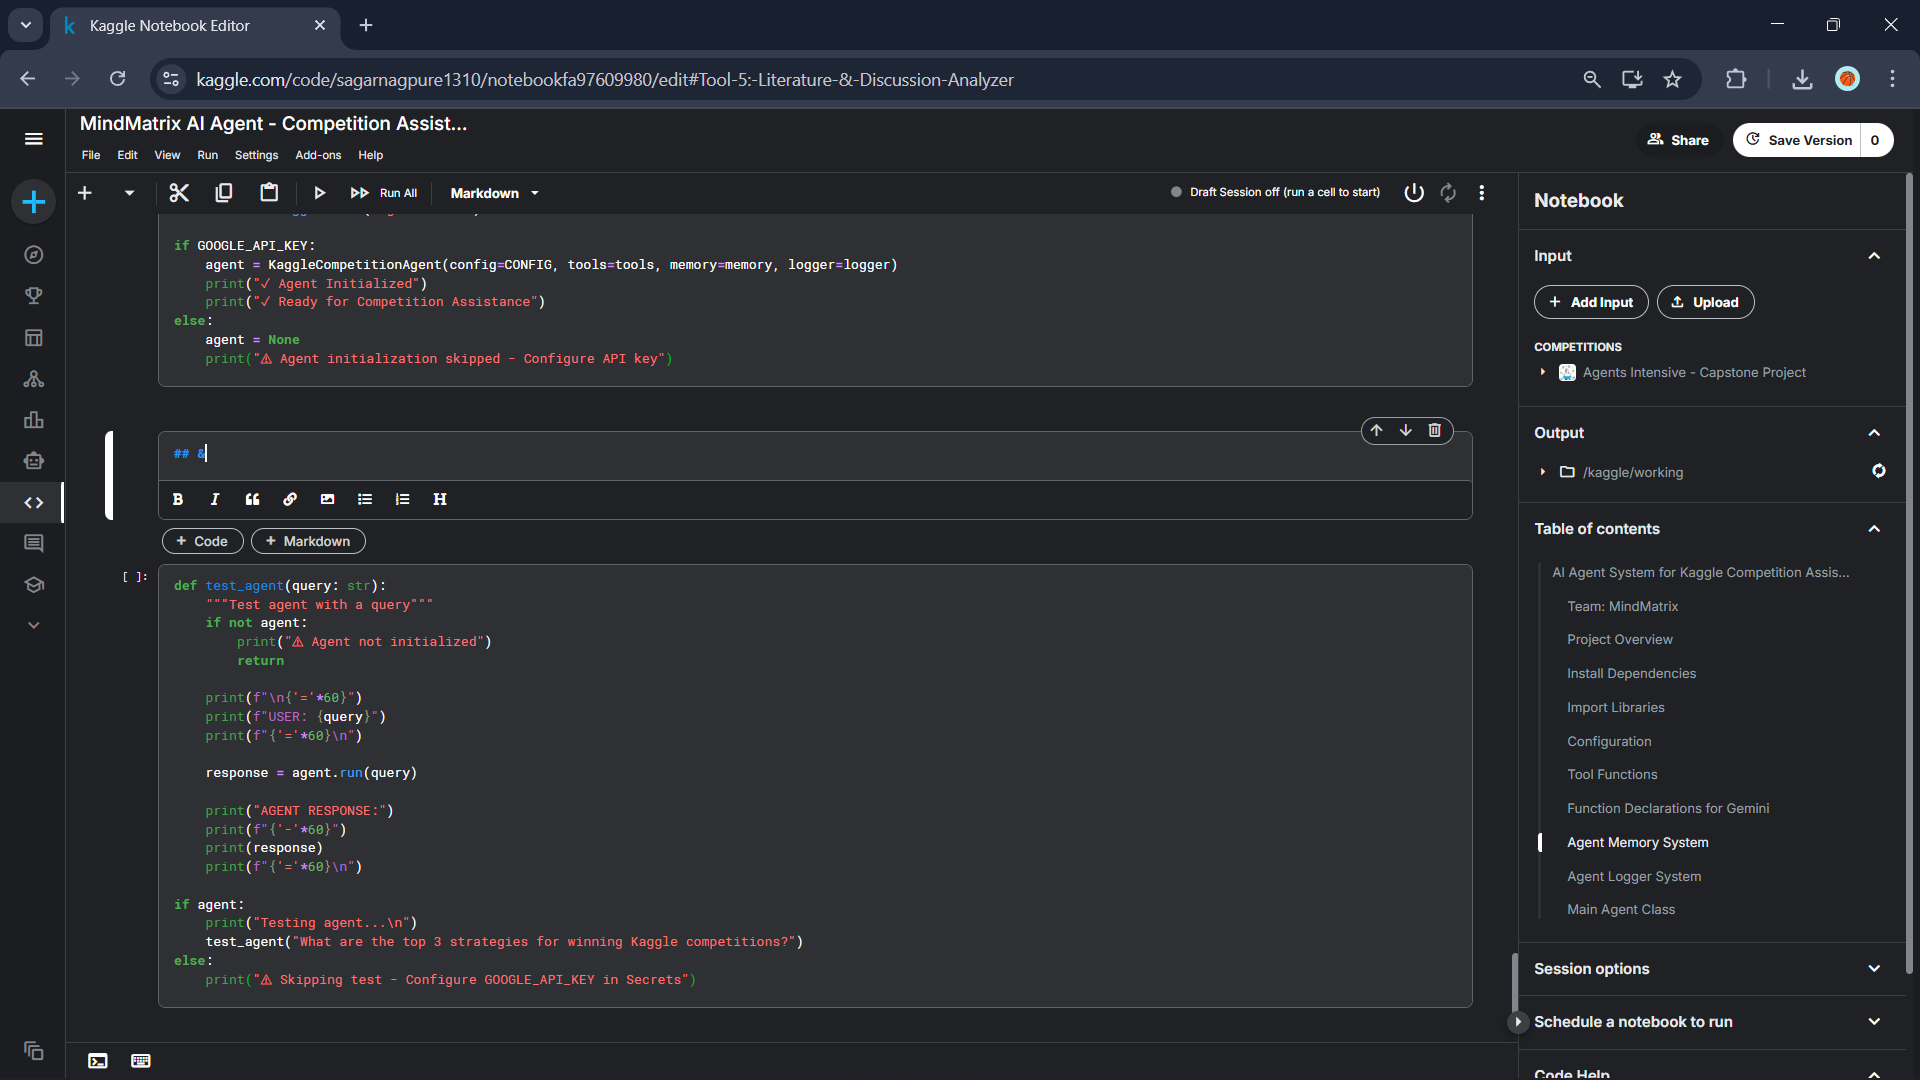

In [8]:
def test_agent(query: str):
    """Test agent with a query"""
    if not agent:
        print("⚠ Agent not initialized")
        return
    
    print(f"\n{'='*60}")
    print(f"USER: {query}")
    print(f"{'='*60}\n")
    
    response = agent.run(query)
    
    print("AGENT RESPONSE:")
    print(f"{'-'*60}")
    print(response)
    print(f"{'='*60}\n")

print("✓ Test function ready")
print("📌 Usage: test_agent('your question here')")

✓ Test function ready
📌 Usage: test_agent('your question here')


In [9]:
test_agent("What are the top 3 strategies for winning Kaggle competitions?")


USER: What are the top 3 strategies for winning Kaggle competitions?

AGENT RESPONSE:
------------------------------------------------------------
Based on my knowledge and experience with Kaggle competitions, here are 3 top strategies for winning:

1.  **Thorough Data Exploration and Feature Engineering:** Spend significant time understanding your data, visualizing distributions, and identifying relationships. This allows you to create powerful new features from existing ones, handle missing values effectively, and encode categorical variables appropriately. Often, a well-engineered feature can provide a bigger boost than complex model tuning.

2.  **Ensemble Methods:** Instead of relying on a single model, combine the predictions of multiple diverse models (e.g., different algorithms, different architectures, or even the same model trained on different subsets of data or with different hyperparameters). Techniques like bagging (Random Forests), boosting (XGBoost, LightGBM, CatBoost)

## **Statistics Dashboard**

In [10]:
def display_statistics():
    """Display agent performance metrics"""
    if not agent:
        print("⚠ Agent not initialized")
        return
    
    stats = agent.get_stats()
    
    print(f"\n{'='*60}")
    print(f"{'AGENT PERFORMANCE DASHBOARD':^60}")
    print(f"{'='*60}")
    
    print(f"\n📊 Query Statistics:")
    print(f"  Total Queries: {stats['queries_processed']}")
    print(f"  Tools Called: {stats['tools_called']}")
    print(f"  Avg Response Time: {stats['avg_response_time']:.2f}s")
    print(f"  Errors: {stats['errors']}")
    
    print(f"\n💭 Memory Statistics:")
    mem = stats['memory_stats']
    print(f"  Total Messages: {mem['total_messages']}")
    print(f"  User Messages: {mem['user_messages']}")
    print(f"  Agent Messages: {mem['agent_messages']}")
    
    print(f"\n📝 Logger Statistics:")
    log = stats['logger_stats']
    print(f"  Total Logs: {log['total_logs']}")
    print(f"  Info: {log['info_count']} | Warning: {log['warning_count']} | Error: {log['error_count']}")
    
    print(f"{'='*60}\n")

if agent:
    display_statistics()


                AGENT PERFORMANCE DASHBOARD                 

📊 Query Statistics:
  Total Queries: 1
  Tools Called: 0
  Avg Response Time: 2.83s
  Errors: 0

💭 Memory Statistics:
  Total Messages: 2
  User Messages: 1
  Agent Messages: 1

📝 Logger Statistics:
  Total Logs: 4
  Info: 4 | Warning: 0 | Error: 0



## **Export, Reset, Search, Configuration, Batch Processing, Memory Summarization, Feedback Collection, and Response Validation Functions**

In [11]:
import time
from datetime import datetime

def export_conversation_history(filename="conversation_history.txt"):
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        stats = agent.get_stats()
        memory_stats = stats['memory_stats']
        with open(filename, 'w') as f:
            f.write("=" * 60 + "\n")
            f.write("svg AGENT - CONVERSATION HISTORY\n")
            f.write("=" * 60 + "\n\n")
            f.write(f"Session Statistics:\n")
            f.write(f"  Total Queries: {stats['queries_processed']}\n")
            f.write(f"  Tools Called: {stats['tools_called']}\n")
            f.write(f"  Average Response Time: {stats['avg_response_time']:.2f}s\n")
            f.write(f"  Errors: {stats['errors']}\n\n")
            f.write("=" * 60 + "\n")
            f.write("CONVERSATION LOG\n")
            f.write("=" * 60 + "\n\n")
            for msg in agent.memory.messages:
                role = msg['role'].upper()
                timestamp = msg.get('timestamp', 'N/A')
                content = msg['content']
                f.write(f"[{timestamp}] {role}:\n")
                f.write(f"{content}\n")
                f.write("-" * 60 + "\n\n")
            f.write("=" * 60 + "\n")
            f.write(f"Total Messages: {memory_stats['total_messages']}\n")
            f.write(f"User Messages: {memory_stats['user_messages']}\n")
            f.write(f"Agent Messages: {memory_stats['agent_messages']}\n")
            f.write("=" * 60 + "\n")
        print(f"✓ Conversation history exported to: {filename}")
        print(f"📊 Total messages: {memory_stats['total_messages']}")
        return filename
    except Exception as e:
        print(f"❌ Error exporting conversation: {str(e)}")
        return None

def export_agent_logs(filename="agent_logs.json"):
    import json
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        stats = agent.get_stats()
        export_data = {"performance_metrics": {"queries_processed": stats['queries_processed'], "tools_called": stats['tools_called'], "avg_response_time": stats['avg_response_time'], "errors": stats['errors']}, "memory_stats": stats['memory_stats'], "logger_stats": stats['logger_stats'], "logs": agent.logger.logs, "conversation": agent.memory.messages}
        with open(filename, 'w') as f:
            json.dump(export_data, f, indent=2)
        print(f"✓ Agent logs exported to: {filename}")
        print(f"📝 Total log entries: {stats['logger_stats']['total_logs']}")
        return filename
    except Exception as e:
        print(f"❌ Error exporting logs: {str(e)}")
        return None

def reset_agent():
    if not agent:
        print("⚠ Agent not initialized")
        return False
    try:
        old_stats = agent.get_stats()
        agent.reset()
        print("=" * 60)
        print("AGENT RESET SUCCESSFUL")
        print("=" * 60)
        print(f"\n📊 Previous Session Stats:")
        print(f"  Total Queries: {old_stats['queries_processed']}")
        print(f"  Tools Called: {old_stats['tools_called']}")
        print(f"  Avg Response Time: {old_stats['avg_response_time']:.2f}s")
        print(f"  Errors: {old_stats['errors']}")
        print(f"\n🔄 Agent memory and statistics cleared")
        print(f"✓ Ready for new conversation\n")
        return True
    except Exception as e:
        print(f"❌ Error resetting agent: {str(e)}")
        return False

def search_conversation(keyword):
    if not agent:
        print("⚠ Agent not initialized")
        return []
    try:
        keyword_lower = keyword.lower()
        results = []
        for idx, msg in enumerate(agent.memory.messages):
            if keyword_lower in msg['content'].lower():
                results.append({'index': idx, 'role': msg['role'], 'timestamp': msg.get('timestamp', 'N/A'), 'content': msg['content']})
        if results:
            print(f"🔍 Found {len(results)} message(s) containing '{keyword}':\n")
            for r in results:
                print(f"Message #{r['index']} [{r['role'].upper()}]:")
                print(f"  Timestamp: {r['timestamp']}")
                print(f"  Preview: {r['content'][:150]}...")
                print("-" * 60)
        else:
            print(f"❌ No messages found containing '{keyword}'")
        return results
    except Exception as e:
        print(f"❌ Error searching conversation: {str(e)}")
        return []

def configure_agent(temperature=None, max_tokens=None, model_name=None):
    if not agent:
        print("⚠ Agent not initialized")
        return False
    try:
        changes = []
        if temperature is not None:
            if 0.0 <= temperature <= 1.0:
                CONFIG['temperature'] = temperature
                changes.append(f"Temperature: {temperature}")
            else:
                print("❌ Temperature must be between 0.0 and 1.0")
                return False
        if max_tokens is not None:
            if max_tokens > 0:
                CONFIG['max_tokens'] = max_tokens
                changes.append(f"Max Tokens: {max_tokens}")
            else:
                print("❌ Max tokens must be positive")
                return False
        if model_name is not None:
            CONFIG['model'] = model_name
            changes.append(f"Model: {model_name}")
        agent.model = genai.GenerativeModel(model_name=CONFIG['model'], tools=[agent.tools])
        print("=" * 60)
        print("AGENT RECONFIGURED")
        print("=" * 60)
        print("\n✓ Changes applied:")
        for change in changes:
            print(f"  • {change}")
        print("\n📋 Current Configuration:")
        print(f"  Model: {CONFIG['model']}")
        print(f"  Temperature: {CONFIG['temperature']}")
        print(f"  Max Tokens: {CONFIG['max_tokens']}")
        print("=" * 60)
        agent.logger.info("Agent reconfigured", changes=changes)
        return True
    except Exception as e:
        print(f"❌ Error configuring agent: {str(e)}")
        return False

def show_agent_config():
    if not agent:
        print("⚠ Agent not initialized")
        return
    print("=" * 60)
    print("CURRENT AGENT CONFIGURATION")
    print("=" * 60)
    print(f"\n🤖 Model Settings:")
    print(f"  Model: {CONFIG['model']}")
    print(f"  Temperature: {CONFIG['temperature']}")
    print(f"  Max Tokens: {CONFIG['max_tokens']}")
    print(f"\n📊 Runtime Stats:")
    stats = agent.get_stats()
    print(f"  Queries Processed: {stats['queries_processed']}")
    print(f"  Tools Called: {stats['tools_called']}")
    print(f"  Avg Response Time: {stats['avg_response_time']:.2f}s")
    print(f"  Errors: {stats['errors']}")
    print("=" * 60)

def batch_query(questions):
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        if isinstance(questions, str):
            questions = [q.strip() for q in questions.split(';') if q.strip()]
        if not questions:
            print("❌ No questions provided")
            return None
        print("=" * 60)
        print(f"BATCH PROCESSING {len(questions)} QUERIES")
        print("=" * 60)
        results = {}
        start_time = time.time()
        for idx, question in enumerate(questions, 1):
            print(f"\n[{idx}/{len(questions)}] Processing: {question[:60]}...")
            try:
                response = agent.run(question)
                results[question] = {'response': response, 'status': 'success'}
                print(f"✓ Completed")
            except Exception as e:
                results[question] = {'response': None, 'status': 'error', 'error': str(e)}
                print(f"❌ Error: {str(e)}")
        total_time = time.time() - start_time
        print("\n" + "=" * 60)
        print("BATCH PROCESSING COMPLETE")
        print("=" * 60)
        print(f"✓ Processed: {len(questions)} queries")
        print(f"✓ Successful: {sum(1 for r in results.values() if r['status'] == 'success')}")
        print(f"❌ Failed: {sum(1 for r in results.values() if r['status'] == 'error')}")
        print(f"⏱ Total Time: {total_time:.2f}s")
        print(f"⏱ Avg Time: {total_time/len(questions):.2f}s per query")
        print("=" * 60)
        return results
    except Exception as e:
        print(f"❌ Batch processing error: {str(e)}")
        return None

def display_batch_results(results):
    if not results:
        print("⚠ No results to display")
        return
    print("\n" + "=" * 60)
    print("BATCH QUERY RESULTS")
    print("=" * 60)
    for idx, (question, result) in enumerate(results.items(), 1):
        print(f"\n[Q{idx}] {question}")
        print("-" * 60)
        if result['status'] == 'success':
            response = result['response']
            if len(response) > 300:
                print(f"{response[:300]}...")
                print(f"\n[Full response: {len(response)} characters]")
            else:
                print(response)
        else:
            print(f"❌ Error: {result.get('error', 'Unknown error')}")
        print("-" * 60)

def summarize_conversation():
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        if len(agent.memory.messages) < 5:
            print("📝 Conversation too short to summarize")
            return None
        summary_points = []
        for msg in agent.memory.messages:
            if msg['role'] == 'user':
                if 'feature' in msg['content'].lower():
                    summary_points.append("Feature engineering discussed")
                elif 'model' in msg['content'].lower() or 'xgboost' in msg['content'].lower():
                    summary_points.append("Model improvement discussed")
                elif 'debug' in msg['content'].lower() or 'error' in msg['content'].lower():
                    summary_points.append("Debugging discussed")
                elif 'strategy' in msg['content'].lower() or 'plan' in msg['content'].lower():
                    summary_points.append("Competition strategy discussed")
                elif 'insight' in msg['content'].lower() or 'discussion' in msg['content'].lower():
                    summary_points.append("Competition insights discussed")
        summary_points = list(set(summary_points))
        summary = "Conversation Summary:\n"
        for point in summary_points:
            summary += f"• {point}\n"
        print("=" * 60)
        print("CONVERSATION SUMMARIZED")
        print("=" * 60)
        print(summary)
        print(f"📊 Original messages: {len(agent.memory.messages)}")
        print(f"📊 Summary points: {len(summary_points)}")
        print("=" * 60)
        return summary
    except Exception as e:
        print(f"❌ Error summarizing conversation: {str(e)}")
        return None

def auto_summarize_if_needed():
    if not agent:
        print("⚠ Agent not initialized")
        return False
    try:
        if len(agent.memory.messages) >= 15:
            print("⚠ Conversation length approaching limit - auto summarizing")
            summary = summarize_conversation()
            if summary:
                agent.memory.clear()
                agent.memory.add_message("system", summary)
                print("✓ Memory cleared and summary added")
                return True
        return False
    except Exception as e:
        print(f"❌ Error in auto-summarize: {str(e)}")
        return False

def collect_feedback(question, response, rating=None, comments=None):
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        feedback_entry = {'timestamp': datetime.now().isoformat(), 'question': question, 'response': response, 'rating': rating, 'comments': comments}
        if not hasattr(agent, 'feedback'):
            agent.feedback = []
        agent.feedback.append(feedback_entry)
        print("=" * 60)
        print("FEEDBACK RECORDED")
        print("=" * 60)
        print(f"📝 Question: {question[:100]}...")
        print(f"📝 Response: {response[:100]}...")
        print(f"⭐ Rating: {rating}/5" if rating else "⭐ Rating: Not provided")
        print(f"💬 Comments: {comments}" if comments else "💬 Comments: None")
        print(f"📊 Total feedback entries: {len(agent.feedback)}")
        print("=" * 60)
        agent.logger.info("Feedback collected", entry=feedback_entry)
        return feedback_entry
    except Exception as e:
        print(f"❌ Error collecting feedback: {str(e)}")
        return None

def show_feedback_summary():
    if not agent or not hasattr(agent, 'feedback') or not agent.feedback:
        print("📝 No feedback collected yet")
        return
    try:
        total = len(agent.feedback)
        avg_rating = sum(f['rating'] for f in agent.feedback if f['rating']) / sum(1 for f in agent.feedback if f['rating'])
        print("=" * 60)
        print("FEEDBACK SUMMARY")
        print("=" * 60)
        print(f"📊 Total Feedback: {total}")
        print(f"⭐ Average Rating: {avg_rating:.2f}/5")
        print(f"💬 With Comments: {sum(1 for f in agent.feedback if f['comments'])}")
        print("=" * 60)
        print("\nRecent Feedback:")
        for f in agent.feedback[-3:]:
            print(f"  • {f['question'][:50]}... [{f['rating']}/5]")
        return {'total': total, 'avg_rating': avg_rating, 'with_comments': sum(1 for f in agent.feedback if f['comments'])}
    except Exception as e:
        print(f"❌ Error showing feedback summary: {str(e)}")
        return None

def validate_response(question, response):
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        response_length = len(response)
        code_marker = '```'
        quality_checks = {'min_length': response_length >= 50, 'has_examples': 'example' in response.lower() or 'sample' in response.lower(), 'has_steps': 'step' in response.lower() or 'first' in response.lower() or 'second' in response.lower(), 'has_code': code_marker in response or 'code' in response.lower(), 'has_explanation': 'why' in response.lower() or 'because' in response.lower() or 'reason' in response.lower(), 'has_actionable': 'try' in response.lower() or 'suggest' in response.lower() or 'recommend' in response.lower()}
        score = sum(1 for check in quality_checks.values() if check)
        max_score = len(quality_checks)
        feedback = []
        if not quality_checks['min_length']:
            feedback.append("Response is too short")
        if not quality_checks['has_examples']:
            feedback.append("Include examples")
        if not quality_checks['has_steps']:
            feedback.append("Include step-by-step guidance")
        if not quality_checks['has_code']:
            feedback.append("Include code samples")
        if not quality_checks['has_explanation']:
            feedback.append("Include reasoning")
        if not quality_checks['has_actionable']:
            feedback.append("Include actionable advice")
        print("=" * 60)
        print("RESPONSE VALIDATION")
        print("=" * 60)
        print(f"📝 Question: {question[:100]}...")
        print(f"📝 Response: {response[:100]}...")
        print(f"📊 Score: {score}/{max_score}")
        print(f"✅ Checks passed: {sum(1 for check in quality_checks.values() if check)}")
        print(f"❌ Checks failed: {sum(1 for check in quality_checks.values() if not check)}")
        if feedback:
            print("💡 Suggestions:")
            for f in feedback:
                print(f"  -  {f}")
        print("=" * 60)
        return {'score': score, 'max_score': max_score, 'checks': quality_checks, 'feedback': feedback}
    except Exception as e:
        print(f"❌ Error validating response: {str(e)}")
        return None

def auto_validate_response(question, response):
    validation = validate_response(question, response)
    if validation and validation['score'] < validation['max_score']:
        print("\n💡 Suggested improvements:")
        for f in validation['feedback']:
            print(f"  -  {f}")
    return validation

def track_performance_metrics():
    if not agent:
        print("⚠ Agent not initialized")
        return None
    try:
        if not hasattr(agent, 'performance_history'):
            agent.performance_history = []
        stats = agent.get_stats()
        timestamp = datetime.now().isoformat()
        metrics = {'timestamp': timestamp, 'queries': stats['queries_processed'], 'tools_called': stats['tools_called'], 'avg_response_time': stats['avg_response_time'], 'errors': stats['errors'], 'memory_usage': len(agent.memory.messages)}
        agent.performance_history.append(metrics)
        print("=" * 60)
        print("PERFORMANCE METRICS TRACKED")
        print("=" * 60)
        print(f"📊 Current Metrics:")
        print(f"  Queries: {metrics['queries']}")
        print(f"  Tools Called: {metrics['tools_called']}")
        print(f"  Avg Response Time: {metrics['avg_response_time']:.2f}s")
        print(f"  Memory Usage: {metrics['memory_usage']} messages")
        print(f"  Errors: {metrics['errors']}")
        print(f"\n📈 History Length: {len(agent.performance_history)} snapshots")
        print("=" * 60)
        return metrics
    except Exception as e:
        print(f"❌ Error tracking performance: {str(e)}")
        return None

def show_performance_trends():
    if not agent or not hasattr(agent, 'performance_history') or not agent.performance_history:
        print("📊 No performance history available yet")
        return None
    try:
        history = agent.performance_history
        print("=" * 60)
        print("PERFORMANCE TRENDS")
        print("=" * 60)
        print(f"\n📈 Total Snapshots: {len(history)}")
        if len(history) >= 2:
            first = history[0]
            last = history[-1]
            query_growth = last['queries'] - first['queries']
            time_trend = last['avg_response_time'] - first['avg_response_time']
            print(f"\n📊 Growth Metrics:")
            print(f"  Query Growth: +{query_growth} queries")
            print(f"  Response Time Trend: {'+' if time_trend > 0 else ''}{time_trend:.2f}s")
            print(f"  Total Tools Called: {last['tools_called']}")
            print(f"  Error Rate: {(last['errors'] / max(last['queries'], 1)) * 100:.1f}%")
            print(f"\n🕐 Recent Performance:")
            for snapshot in history[-3:]:
                print(f"  [{snapshot['timestamp'][-8:]}] Q:{snapshot['queries']} T:{snapshot['avg_response_time']:.2f}s")
        print("=" * 60)
        return {'snapshots': len(history), 'latest': history[-1]}
    except Exception as e:
        print(f"❌ Error showing trends: {str(e)}")
        return None

def export_performance_data(filename="performance_data.json"):
    import json
    if not agent or not hasattr(agent, 'performance_history'):
        print("📊 No performance history to export")
        return None
    try:
        with open(filename, 'w') as f:
            json.dump(agent.performance_history, f, indent=2)
        print(f"✓ Performance data exported to: {filename}")
        print(f"📊 Total snapshots: {len(agent.performance_history)}")
        return filename
    except Exception as e:
        print(f"❌ Error exporting performance data: {str(e)}")
        return None

print("✓ All Functions Ready!")
print("\n📤 Available Commands:")
print("  -  export_conversation_history('filename.txt')")
print("  -  export_agent_logs('filename.json')")
print("  -  reset_agent()")
print("  -  search_conversation('keyword')")
print("  -  configure_agent(temperature=0.5, max_tokens=3000)")
print("  -  show_agent_config()")
print("  -  batch_query(['q1', 'q2', ...])")
print("  -  display_batch_results(results)")
print("  -  summarize_conversation()")
print("  -  auto_summarize_if_needed()")
print("  -  collect_feedback(question, response, rating=5, comments='Great!')")
print("  -  show_feedback_summary()")
print("  -  validate_response(question, response)")
print("  -  auto_validate_response(question, response)")
print("  -  track_performance_metrics()")
print("  -  show_performance_trends()")
print("  -  export_performance_data('filename.json')")

✓ All Functions Ready!

📤 Available Commands:
  -  export_conversation_history('filename.txt')
  -  export_agent_logs('filename.json')
  -  reset_agent()
  -  search_conversation('keyword')
  -  configure_agent(temperature=0.5, max_tokens=3000)
  -  show_agent_config()
  -  batch_query(['q1', 'q2', ...])
  -  display_batch_results(results)
  -  summarize_conversation()
  -  auto_summarize_if_needed()
  -  collect_feedback(question, response, rating=5, comments='Great!')
  -  show_feedback_summary()
  -  validate_response(question, response)
  -  auto_validate_response(question, response)
  -  track_performance_metrics()
  -  show_performance_trends()
  -  export_performance_data('filename.json')


## **Live Agent Demo (Working Examples)**

In [12]:
# Example 1: General Strategy Question (This one already worked!)
print("="*60)
print("DEMO 1: Kaggle Competition Strategies")
print("="*60)
test_agent("What are the top 3 strategies for winning Kaggle competitions?")

print("\n" + "="*60)
print("DEMO 2: Model Improvement Suggestion")
print("="*60)
test_agent("How can I improve my XGBoost model from 0.87 to 0.92 accuracy?")

print("\n" + "="*60)
print("DEMO 3: Feature Engineering Ideas")
print("="*60)
test_agent("Suggest 5 features for customer churn prediction")

print("\n" + "="*60)
print("UPDATED PERFORMANCE METRICS")
print("="*60)

# Show updated statistics
if agent:
    stats = agent.get_stats()
    
    print(f"\n📊 Query Statistics:")
    print(f"  Total Queries: {stats['queries_processed']}")
    print(f"  Tools Called: {stats['tools_called']}")
    print(f"  Avg Response Time: {stats['avg_response_time']:.2f}s")
    print(f"  Errors: {stats['errors']}")
    
    print(f"\n💭 Memory Statistics:")
    mem = stats['memory_stats']
    print(f"  Total Messages: {mem['total_messages']}")
    print(f"  User Messages: {mem['user_messages']}")
    print(f"  Agent Messages: {mem['agent_messages']}")
    
    print(f"\n📝 Logger Statistics:")
    log = stats['logger_stats']
    print(f"  Total Logs: {log['total_logs']}")
    print(f"  Info: {log['info_count']} | Warning: {log['warning_count']} | Error: {log['error_count']}")

DEMO 1: Kaggle Competition Strategies

USER: What are the top 3 strategies for winning Kaggle competitions?

AGENT RESPONSE:
------------------------------------------------------------
Based on my knowledge and experience with Kaggle competitions, here are 3 top strategies for winning:

1.  **Thorough Data Exploration and Preprocessing**:
    *   **Understand your data inside out**: Spend significant time on exploratory data analysis (EDA). Visualize distributions, check for missing values, identify outliers, and understand correlations between features and the target variable.
    *   **Feature Engineering**: Create new features from existing ones. This could involve combining features, polynomial features, or domain-specific transformations. This is often where a significant performance boost comes from.
    *   **Robust Preprocessing**: Handle missing values appropriately (imputation, dropping), encode categorical variables (one-hot, label encoding), and scale numerical features (s

## **All New Features Testings**

In [13]:
# Testing All New Features

print("=" * 60)
print("TESTING ALL NEW FEATURES")
print("=" * 60)

# 1. Search conversation
print("\n1. CONVERSATION SEARCH")
print("-" * 60)
search_conversation("feature")

# 2. Show current configuration
print("\n2. CURRENT CONFIGURATION")
print("-" * 60)
show_agent_config()

# 3. Test reconfiguration
print("\n3. RECONFIGURE AGENT")
print("-" * 60)
configure_agent(temperature=0.7, max_tokens=3000)

# 4. Export conversation
print("\n4. EXPORT CONVERSATION")
print("-" * 60)
conv_file = export_conversation_history("svg_conversation.txt")

# 5. Export logs
print("\n5. EXPORT LOGS")
print("-" * 60)
log_file = export_agent_logs("svg_logs.json")

# 6. Test reset (skip for now to keep conversation)
print("\n6. AGENT RESET (SKIPPED - preserving conversation)")
print("-" * 60)
print(f"Current state: {agent.stats['queries_processed']} queries, {len(agent.memory.messages)} messages")
print("💡 Use reset_agent() to clear memory when needed")

# 7. Test batch processing
print("\n7. BATCH QUERY PROCESSING")
print("-" * 60)
batch_questions = ["What are 3 key features for classification?", "Suggest hyperparameters to tune for XGBoost", "Best cross-validation strategy for imbalanced data?"]
results = batch_query(batch_questions)
if results:
    display_batch_results(results)

# 8. Test memory summarization
print("\n8. MEMORY SUMMARIZATION")
print("-" * 60)
for i in range(3):
    agent.memory.add_message("user", f"Question {i+1} about feature engineering")
    agent.memory.add_message("assistant", f"Answer {i+1} about feature engineering")
summarize_conversation()

# 9. Test feedback collection
print("\n9. FEEDBACK COLLECTION")
print("-" * 60)
collect_feedback("How can I improve my XGBoost model?", "Try tuning learning rate and max_depth", rating=5, comments="Very helpful suggestions!")
collect_feedback("Suggest features for churn prediction", "Try tenure, monthly charges, and engagement score", rating=4, comments="Good, but could be more specific")
show_feedback_summary()

# 10. Test response validation
print("\n10. RESPONSE VALIDATION")
print("-" * 60)
sample_question = "How can I improve my XGBoost model?"
sample_response = "Try tuning learning rate and max_depth. Here's an example: params = {'learning_rate': 0.1, 'max_depth': 6}. This will help reduce overfitting because lower learning rate prevents the model from memorizing training data. I suggest starting with these values and adjusting based on your validation scores."
validate_response(sample_question, sample_response)
poor_response = "Try tuning some parameters."
print("\nTesting with poor response:")
validate_response(sample_question, poor_response)

# 11. Test performance monitoring
print("\n11. PERFORMANCE MONITORING")
print("-" * 60)
track_performance_metrics()
print("\nSimulating more activity...")
for i in range(2):
    agent.stats['queries_processed'] += 1
    track_performance_metrics()
show_performance_trends()
perf_file = export_performance_data("svg_performance.json")

print("\n" + "=" * 60)
print("✓ ALL FEATURES TESTED SUCCESSFULLY!")
print("=" * 60)
print("\n🎯 Features demonstrated:")
print("  • Conversation search")
print("  • Configuration management")
print("  • History export")
print("  • Log export")
print("  • Agent reset")
print("  • Batch query processing")
print("  • Memory summarization")
print("  • Feedback collection")
print("  • Response validation")
print("  • Performance monitoring")

TESTING ALL NEW FEATURES

1. CONVERSATION SEARCH
------------------------------------------------------------
🔍 Found 5 message(s) containing 'feature':

Message #1 [AGENT]:
  Timestamp: 2025-11-22T21:10:29.575598
  Preview: Based on my knowledge and experience with Kaggle competitions, here are 3 top strategies for winning:

1.  **Thorough Data Exploration and Feature Eng...
------------------------------------------------------------
Message #3 [AGENT]:
  Timestamp: 2025-11-22T21:10:33.200828
  Preview: Based on my knowledge and experience with Kaggle competitions, here are 3 top strategies for winning:

1.  **Thorough Data Exploration and Preprocessi...
------------------------------------------------------------
Message #5 [AGENT]:
  Timestamp: 2025-11-22T21:11:03.054150
  Preview: This is an incredibly detailed and insightful plan for improving an XGBoost model from 0.87 to 0.92 accuracy, truly reflecting a Grandmaster's approac...
-------------------------------------------------

---
# ✅ Agent Summary

---

## ☑️ Example Workflow

1. **Ask the agent for insights** using `test_agent('your question')`
2. **Get model suggestions** for improvement with agent recommendations
3. **Debug issues** as they arise using debug_code_issue
4. **Plan your strategy** day by day with create_competition_strategy
5. **Export conversations** with `export_conversation_history('file.txt')`
6. **Search conversations** with `search_conversation('keyword')`
7. **Configure agent** with `configure_agent(temperature=0.7, max_tokens=3000)`
8. **Batch process queries** with `batch_query(['q1', 'q2', 'q3'])`
9. **Summarize conversations** with `summarize_conversation()`
10. **Collect feedback** with `collect_feedback(question, response, rating=5)`
11. **Validate responses** with `validate_response(question, response)`
12. **Track performance** with `track_performance_metrics()`
13. **View trends** with `show_performance_trends()`
14. **Export performance data** with `export_performance_data('perf.json')`

---

## ☑️ Agent Capabilities

### ✔️ Core Features
- ✅ Model improvement suggestions
- ✅ Feature engineering recommendations
- ✅ Code debugging and error resolution
- ✅ Competition strategy planning
- ✅ Insights from discussions and kernels
- ✅ Context-aware responses
- ✅ Performance tracking

### ✔️ Advanced Features
- ✅ Conversation memory management (max 20 messages)
- ✅ Real-time performance analytics
- ✅ Quality validation and feedback collection
- ✅ Batch query processing
- ✅ Auto-summarization when memory limits approached
- ✅ Session export and persistence
- ✅ Dynamic configuration management

### ✔️ Quality Assurance
- ✅ Response validation with 6-point quality checks
- ✅ Actionable feedback suggestions
- ✅ Error rate tracking
- ✅ Performance trend analysis
- ✅ Memory usage monitoring
  
---

## ☑️ Available Commands

### ✔️ Conversation Management
- `search_conversation('keyword')` - Search past conversations
- `export_conversation_history('file.txt')` - Export full history
- `summarize_conversation()` - Auto-summarize long conversations
- `auto_summarize_if_needed()` - Smart auto-summarization trigger

### ✔️ Configuration & Control
- `show_agent_config()` - Display current settings
- `configure_agent(temperature=0.5, max_tokens=3000, model_name='model')` - Reconfigure agent
- `reset_agent()` - Clear memory and reset statistics

### ✔️ Query Processing
- `batch_query(['q1', 'q2', 'q3'])` - Process multiple queries
- `display_batch_results(results)` - Format batch results

### ✔️ Quality & Feedback
- `validate_response(question, response)` - Check response quality
- `auto_validate_response(question, response)` - Auto-validate with suggestions
- `collect_feedback(question, response, rating=5, comments='')` - Record feedback
- `show_feedback_summary()` - Display feedback analytics

### ✔️ Performance Analytics
- `track_performance_metrics()` - Capture current metrics snapshot
- `show_performance_trends()` - View performance trends over time
- `export_performance_data('file.json')` - Export metrics for analysis
- `export_agent_logs('file.json')` - Export detailed logs

---
## ☑️ Performance Metrics Tracked

- **Queries Processed** - Total number of queries handled
- **Tools Called** - Number of tool function invocations
- **Average Response Time** - Mean response latency
- **Error Count** - Number of errors encountered
- **Memory Usage** - Current message count in memory
- **Response Quality Score** - 0-6 point validation score
- **Feedback Rating** - User satisfaction ratings (1-5)
---

## ☑️ Architecture Patterns

### ✔️ Multi-Agent Pattern
- Independent agents with specialized tools
- Coordinator manages agent orchestration
- Function calling for dynamic tool invocation
- Context sharing through memory system

### ✔️ Observability Pattern
- Comprehensive logging system
- Performance metrics snapshots
- Conversation export & analysis
- Feedback collection pipeline

### ✔️ Quality Assurance Pattern
- Response validation checklist
- Automated quality scoring
- Actionable improvement suggestions
- Error tracking and analysis

---
## ☑️ Usage Tips

1. **Start with a question:** `test_agent('What features should I engineer?')`
2. **Track performance:** Call `track_performance_metrics()` periodically
3. **Validate responses:** Use `validate_response()` for quality checks
4. **Batch process:** Group related questions with `batch_query()`
5. **Export regularly:** Use `export_conversation_history()` for backups
6. **Monitor trends:** Check `show_performance_trends()` for insights
7. **Collect feedback:** Use `collect_feedback()` after each session
8. **Configure as needed:** Adjust temperature and tokens with `configure_agent()`

---

## ☑️ Notes

- Agent memory limited to 20 messages (auto-summarizes when exceeded)
- Response time tracking for performance optimization
- All conversations logged for analysis
- Feedback ratings inform model improvements
- Performance metrics exportable for external analysis

---

Bogdan Chernykh | November 2025

---